<a href="https://colab.research.google.com/github/linainsaf/ML-M1/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I. Chargement et mise en forme des données

In [17]:
pip install tensorflow==2.9.2 --ignore-installed

  Using cached tensorflow-2.9.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.8 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached libclang-15.0.6.1-py2.py3-none-manylinux2010_x86_64.whl (21.5 MB)
  Using cached numpy-1.24.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached grpcio-1.51.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
  Using cached protobuf-3.19.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached h5py-3.8.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.7 MB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Using cached flatbuffers-1

In [1]:
# Import libraries and modules
# Import libraries and modules
import numpy as np
import time
np.random.seed(123) # for reproducibility
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Conv2DTranspose, Reshape, Dense, Activation, Flatten, Dropout, Convolution2D, MaxPooling2D, Input
#from utilitaire import affiche
##################################################
# I - Load pre-shuffled MNIST data train and test sets
##################################################
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot

2023-02-28 09:40:55.082039: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-28 09:40:55.082052: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def affiche(history):
 # summarize history for accuracy
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])
 plt.title('model accuracy')
 plt.ylabel('accuracy')
 plt.xlabel('epoch')
 plt.legend(['train', 'test'], loc='upper left')
 plt.show()
 # summarize history for loss
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.title('model loss')
 plt.ylabel('loss')
 plt.xlabel('epoch')
 plt.legend(['train', 'test'], loc='upper left')
 plt.show()

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = load_data()
X_train, pipo, y_train, pipo = train_test_split(X_train, y_train, test_size=0.9)
X_test, pipo, y_test, pipo = train_test_split(X_test, y_test, test_size=0.9)

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train

array([5, 9, 1, ..., 0, 9, 4], dtype=uint8)

In [6]:
len(X_train)

6000

In [8]:
X_train.shape, y_train.shape

((6000, 28, 28), (6000,))

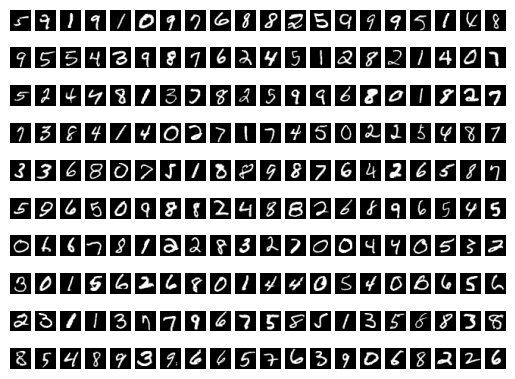

In [11]:
# afficher les images
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(X_train[i,:].reshape([28,28]), cmap='gray')
 plt.axis('off')
plt.show()

In [12]:
# Preprocess input data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# Preprocess class labels
Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)
X_test.shape

(1000, 28, 28, 1)

Questions
-  Que réalise-t-il ? Justifier chaque ligne.
- Combien y a-t-il d’images dans la base de test ? Dans la base d’apprentissage ? 
-Quelle est la taille des images ? Combien y a-t-il de classes ?
- En quoi consiste le pré-traitement des données d’entrées ? Pourquoi le réalise-t-on ?
- A quoi sert la fonction tf.keras.utils.to_categorical ? 
- Quelle est la taille de y_train ? de
Y_train ? Commenter

In [ ]:
print("nombre d'images en train : ", len(X_train))
print("nombre d'images en test : ", len(X_test))

print("la taille des images est : ", len(X_train[0]),'x',len(X_train[0][0]),"pixels")

print("Nombre de  de classes : ", Y_test.shape[1])

II. Régression logistique (Classification) avec des couches dense


II.1. définition du réseau

In [9]:
inputs = Input(shape=(28,28,1))
x = inputs

# on fait une transformation
x=Flatten()(x)

#couche caché on a ici  1 couche de dense
i= Dense(256, activation='relu')(x)

# 10 classes donc 10 neurones de sorties
# fonction d'activaion active le neurone si son poids est important
# la fonction d'activation est non linéaire elle construit la solution de façon plus complexe
# seconde couche de dense + 1 couche d'activation softmax
outputs = Dense(10, activation='softmax')(i)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


2023-02-28 10:11:52.969679: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-28 10:11:52.969697: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-28 10:11:52.969713: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (py4bd-15): /proc/driver/nvidia/version does not exist
2023-02-28 10:11:52.969831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
================================================================
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
=================================================================
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0

- nombre d'entrée : on a 784 flatten
- nombre de poids : 784 * 256
- nombre de biais : 256
- nombre de parametres dans la couche dense 784 * 256 + 256 = 200960
- nombres de parametres total = 200960 + 2570 = 203530

nombres de parametres total donne une indication sur la complexité du calcul

II.2. Apprentissage

On utilise l’optimiseur SGD (Stochastic gradient descent optimizer) avec ses paramètres par défaut :

Epoch 1/15
24/24 [==============================] - 1s 6ms/step - loss: 0.8601 - accuracy: 0.7248 - val_loss: 0.4228 - val_accuracy: 0.8640
Epoch 2/15
24/24 [==============================] - 0s 3ms/step - loss: 0.2623 - accuracy: 0.9187 - val_loss: 0.2677 - val_accuracy: 0.9130
Epoch 3/15
24/24 [==============================] - 0s 3ms/step - loss: 0.1713 - accuracy: 0.9458 - val_loss: 0.2416 - val_accuracy: 0.9310
Epoch 4/15
24/24 [==============================] - 0s 3ms/step - loss: 0.1003 - accuracy: 0.9677 - val_loss: 0.1745 - val_accuracy: 0.9430
Epoch 5/15
24/24 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9803 - val_loss: 0.1913 - val_accuracy: 0.9460
Epoch 6/15
24/24 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9850 - val_loss: 0.1699 - val_accuracy: 0.9490
Epoch 7/15
24/24 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9955 - val_loss: 0.1759 - val_accuracy: 0.9440
Epoch 8/15
24/24 [==

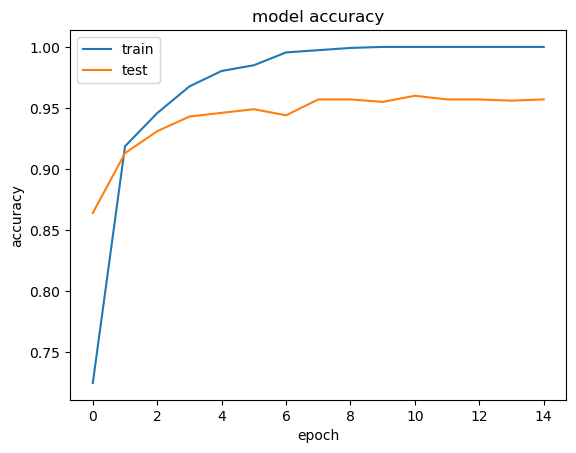

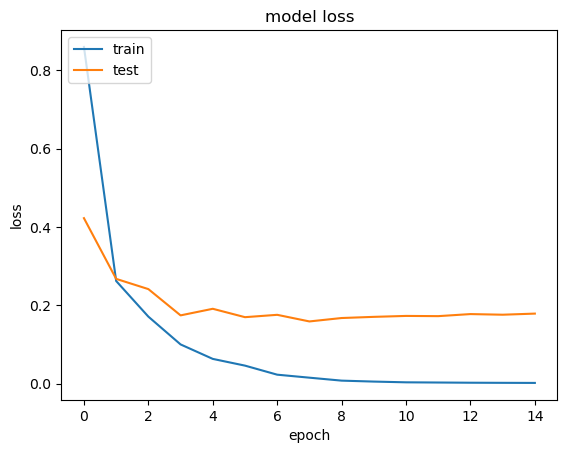

lr= 0.8 batch_size= 256 epochs= 15
Temps d apprentissage 1.538395548999688


In [13]:
lr= 0.8
batch_size=256
epochs=15
sgd1= tf.keras.optimizers.SGD(learning_rate=lr,momentum=0.8)

# loss : on calcule une loss fonction qui représente la marge d'erreur
model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])
tps1 = time.perf_counter()
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
verbose=1,validation_data=(X_test, Y_test))
tps2 = time.perf_counter()
affiche(history) #donnee en annexe
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs)
print('Temps d apprentissage',tps2 - tps1)

II.3. Evaluation du modèle

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Test loss: 0.17902147769927979
Test accuracy: 95.70000171661377
32/32 [==============================] - 0s 591us/step
Confusion Matrix
[[ 84   0   1   0   0   0   0   0   0   0]
 [  0 112   0   0   0   0   1   0   0   0]
 [  0   1 101   0   3   0   0   0   2   0]
 [  0   0   1  94   0   3   0   1   2   0]
 [  0   0   1   0  95   0   0   0   0   0]
 [  0   0   0   1   0  85   1   0   0   1]
 [  1   1   0   0   1   2 101   0   0   0]
 [  0   0   0   2   0   0   0 103   0   1]
 [  0   0   0   1   2   2   0   1  86   0]
 [  0   1   0   2   2   1   0   4   0  96]]


Test loss: 0.17902147769927979
Test accuracy: 95.70000171661377  
32/32 [==============================] - 0s 591us/step
Confusion Matrix
[[ 84   0   1   0   0   0   0   0   0   0]
 [  0 112   0   0   0   0   1   0   0   0]
 [  0   1 101   0   3   0   0   0   2   0]
 [  0   0   1  94   0   3   0   1   2   0]
 [  0   0   1   0  95   0   0   0   0   0]
 [  0   0   0   1   0  85   1   0   0   1]
 [  1   1   0   0   1   2 101   0   0   0]
 [  0   0   0   2   0   0   0 103   0   1]
 [  0   0   0   1   2   2   0   1  86   0]
 [  0   1   0   2   2   1   0   4   0  96]]
 
 - On peut améliorer le visu de la matrice en utilisant la heatmap de seadborn 
 - On obtient un taux d'accuracy à 95% sur les données d'entrainement
 - ici c'est un modèle génératif , on part d'une image on essaie de générer une autre image

IV. CNN

In [15]:
inputs = Input(shape=(28,28,1)) 
x = inputs
x = Convolution2D(32, kernel_size = (3, 3), activation='relu' )(x) 
x = Convolution2D(64, kernel_size = (3, 3), activation='relu' )(x) 
x = MaxPooling2D((3, 3))(x) 
x = Flatten()(x) 
x = Dense(256, activation='relu')(x) 
x = Dropout(0.5)(x) 
outputs= Dense(10, activation='softmax')(x) 
model = Model(inputs, outputs) 
model.summary() 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1048832   
                                                           

Epoch 1/26
24/24 [==============================] - 3s 110ms/step - loss: 2.0946 - accuracy: 0.3557 - val_loss: 1.8024 - val_accuracy: 0.4990
Epoch 2/26
24/24 [==============================] - 3s 104ms/step - loss: 1.7353 - accuracy: 0.4575 - val_loss: 0.5878 - val_accuracy: 0.8110
Epoch 3/26
24/24 [==============================] - 3s 109ms/step - loss: 0.5421 - accuracy: 0.8292 - val_loss: 0.2377 - val_accuracy: 0.9220
Epoch 4/26
24/24 [==============================] - 3s 113ms/step - loss: 0.3195 - accuracy: 0.9038 - val_loss: 0.1591 - val_accuracy: 0.9540
Epoch 5/26
24/24 [==============================] - 3s 111ms/step - loss: 0.2370 - accuracy: 0.9280 - val_loss: 0.1396 - val_accuracy: 0.9590
Epoch 6/26
24/24 [==============================] - 3s 106ms/step - loss: 0.1714 - accuracy: 0.9473 - val_loss: 0.1313 - val_accuracy: 0.9630
Epoch 7/26
24/24 [==============================] - 3s 108ms/step - loss: 0.1535 - accuracy: 0.9525 - val_loss: 0.1184 - val_accuracy: 0.9610
Epoch 

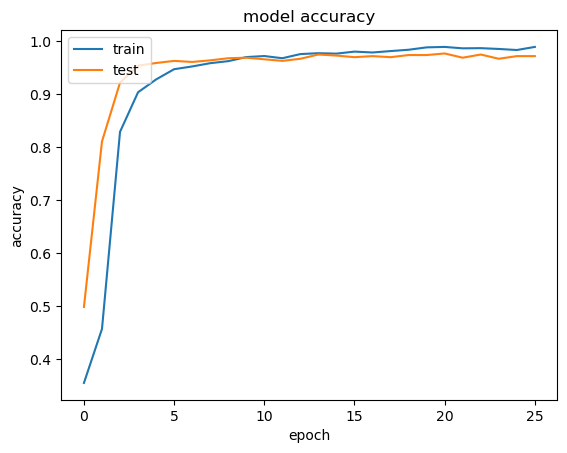

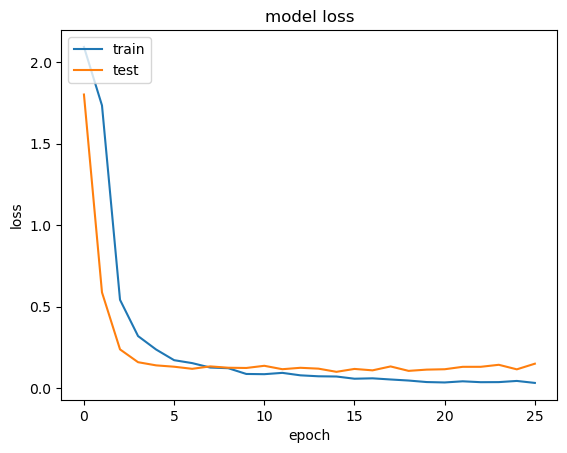

lr= 0.13 batch_size= 256 epochs= 26
Temps d apprentissage 70.08193302000109


In [16]:
lr= 0.13
batch_size=256
epochs=26
sgd1= tf.keras.optimizers.SGD(learning_rate=lr,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])
tps1 = time.perf_counter()
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
verbose=1,validation_data=(X_test, Y_test))
tps2 = time.perf_counter()
affiche(history) #donnee en annexe
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs)
print('Temps d apprentissage',tps2 - tps1)